In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [4]:
data.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [5]:
data.shape

(1111742, 30)

In [6]:
data.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [7]:
#droping the unwanted columns
data.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


### EDA - Exploratory Data Analysis

- Univariate 

Text(0.5, 0, 'matchType')

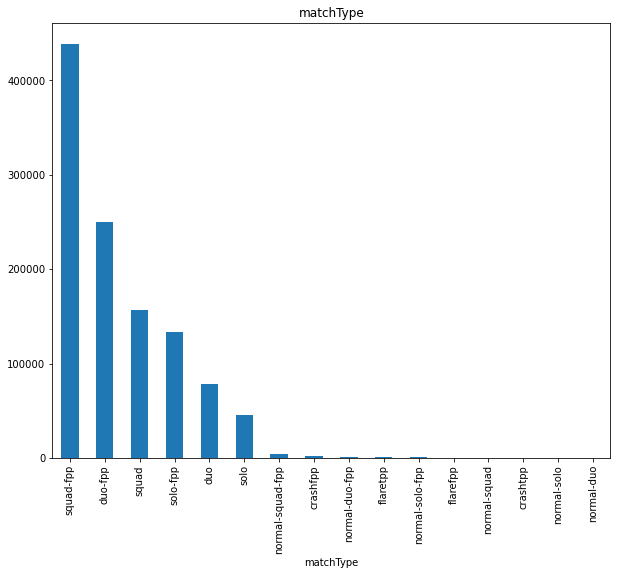

In [9]:
data['matchType'].value_counts().plot(kind='bar',figsize=(10,8))
plt.title('matchType')
plt.xlabel('matchType')

- In matchtype feature There are different types of matches played by players. 
- most of them squard-fpp have played because this squard match increases the score or rank of the player

### matchId 

In [10]:
data.matchId

0          a3d8693390584c
1          b65de9055327e0
2          d6aad3f9830e60
3          d931c0932d8aca
4          ec2b5ed94baae3
                ...      
1111737    ad5719d2422207
1111738    c3f50eef6dbb01
1111739    990a8d68ec2bc4
1111740    f93b1f0defaee5
1111741    0406ce4ab7a1bd
Name: matchId, Length: 1111742, dtype: object

In [11]:
data["match"] = data.groupby("matchId")["matchId"].transform("count")

In [12]:
data["match"].unique()

array([30, 28, 26, 23, 20, 25, 22, 19, 29, 21, 24,  4, 31, 16, 18, 36, 27,
       17, 32, 13, 34, 15, 12, 33, 37, 14,  5,  8, 35, 10, 38,  9,  6,  7,
        2,  3, 39, 40, 11,  1, 42, 41], dtype=int64)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='match', ylabel='count'>

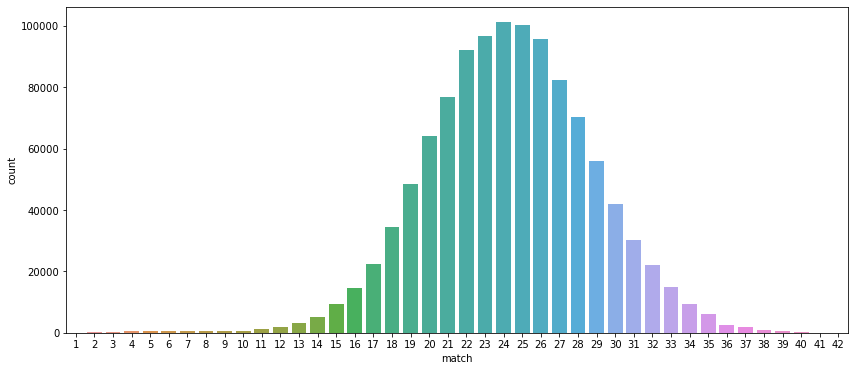

In [13]:
plt.subplots(figsize=(14,6))
#a = data[data["match"]>25]
sns.countplot(data["match"])

### kills

In [14]:
#data.kills.value_counts()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Kill Counts')

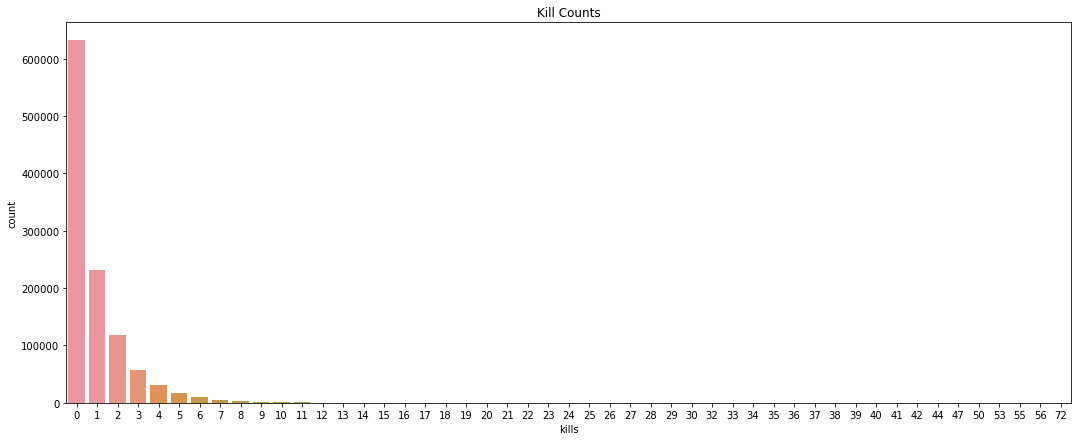

In [15]:
plt.subplots(figsize=(18,7))
sns.countplot(data['kills'])
plt.title('Kill Counts')

- Number of enemy players killed

Text(0.5, 1.0, 'headshotKills')

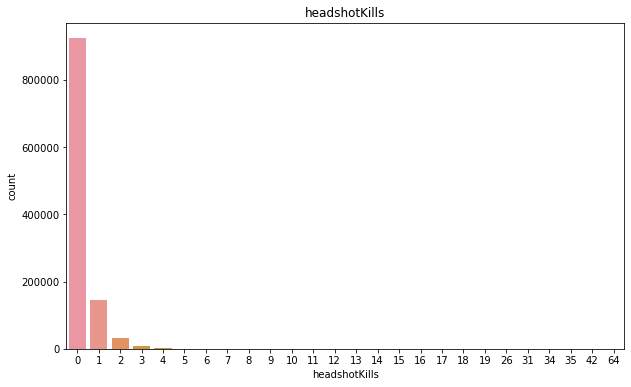

In [16]:
plt.subplots(figsize=(10,6))
sns.countplot(x=data["headshotKills"].sort_values(), data=data)
plt.title('headshotKills')

- Number of enemy players killed with headshots
- There are above 80% are '0' headshots kills in match

### assists

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='assists', ylabel='count'>

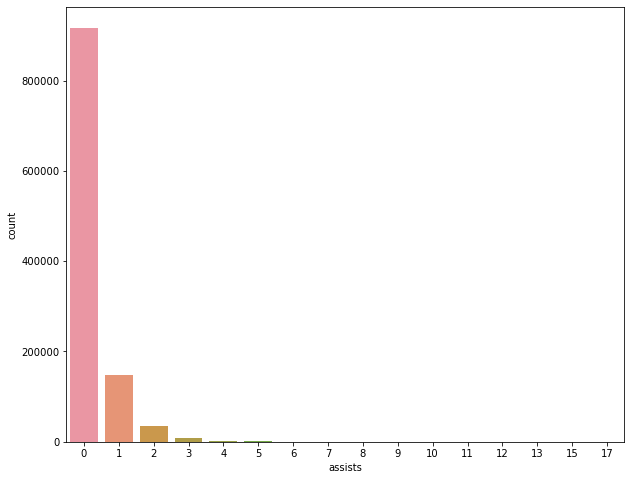

In [17]:
plt.figure(figsize=(10,8))
sns.countplot('assists',data=data)

-  Number of enemy players this player damaged that were killed by teammates
- less numbers are get assists

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'roadKills')

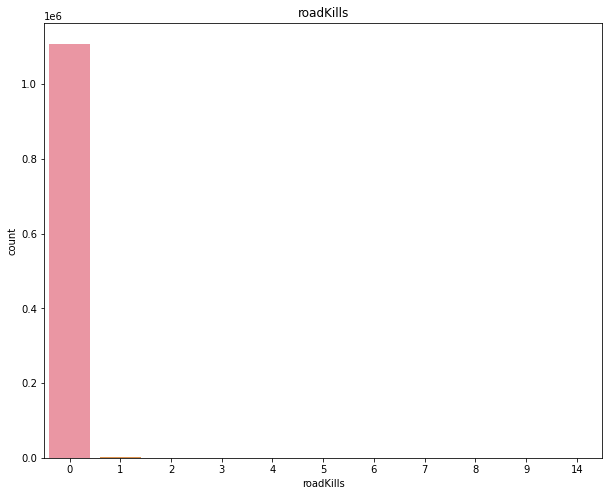

In [18]:
plt.figure(figsize=(10,8))
sns.countplot('roadKills',data=data)
plt.title('roadKills')

- Number of kills while in a vehicle.
- only 1% are killed by road or by hitting vehicle.

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'revives')

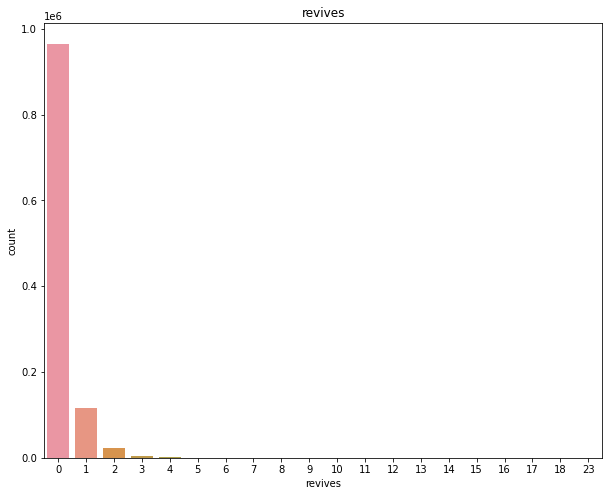

In [19]:
plt.figure(figsize=(10,8))
sns.countplot('revives',data=data)
plt.title('revives')

- Number of times this player revived teammates

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'numGroups')

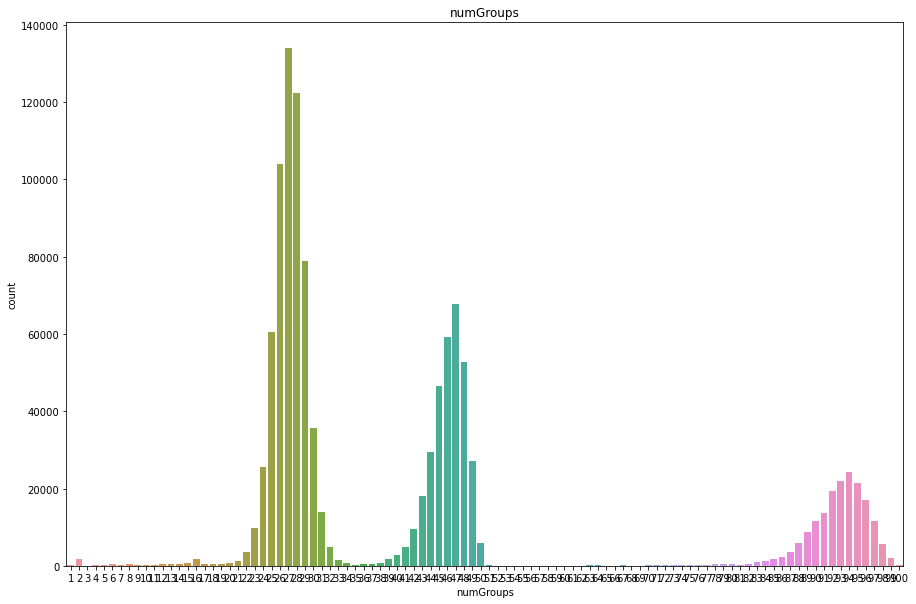

In [20]:

plt.figure(figsize=(15,10))
sns.countplot('numGroups',data=data)
plt.title('numGroups')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'killStreaks')

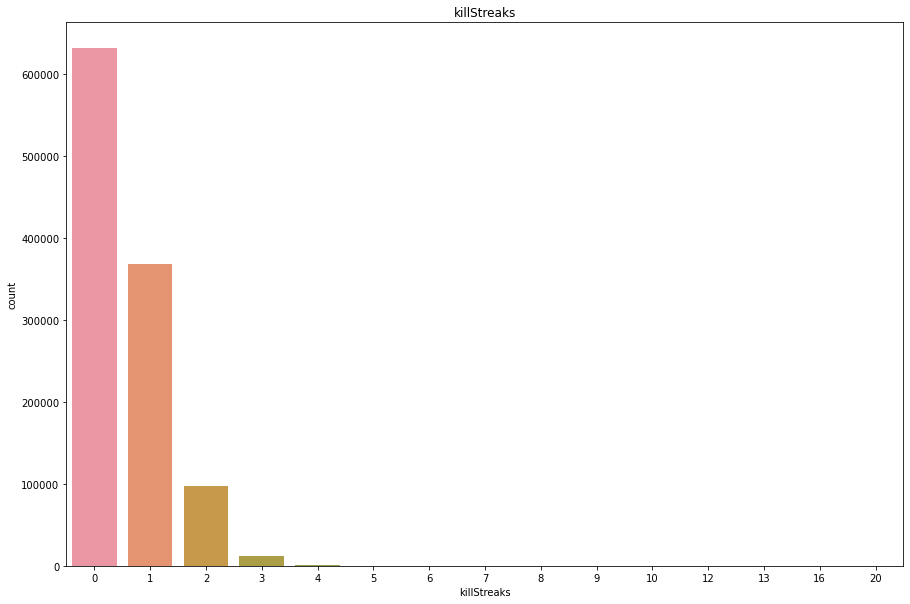

In [21]:
plt.figure(figsize=(15,10))
sns.countplot('killStreaks',data=data)
plt.title('killStreaks')

- Max number of enemy players killed in a short amount of time.

### bivariate analysis

- which type matches are more_win  or more winPlacePerc?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'squad-fpp'),
  Text(1, 0, 'solo-fpp'),
  Text(2, 0, 'solo'),
  Text(3, 0, 'duo'),
  Text(4, 0, 'duo-fpp'),
  Text(5, 0, 'squad'),
  Text(6, 0, 'normal-squad-fpp'),
  Text(7, 0, 'normal-duo-fpp'),
  Text(8, 0, 'normal-solo-fpp'),
  Text(9, 0, 'crashfpp'),
  Text(10, 0, 'crashtpp'),
  Text(11, 0, 'normal-squad'),
  Text(12, 0, 'flaretpp'),
  Text(13, 0, 'flarefpp'),
  Text(14, 0, 'normal-duo'),
  Text(15, 0, 'normal-solo')])

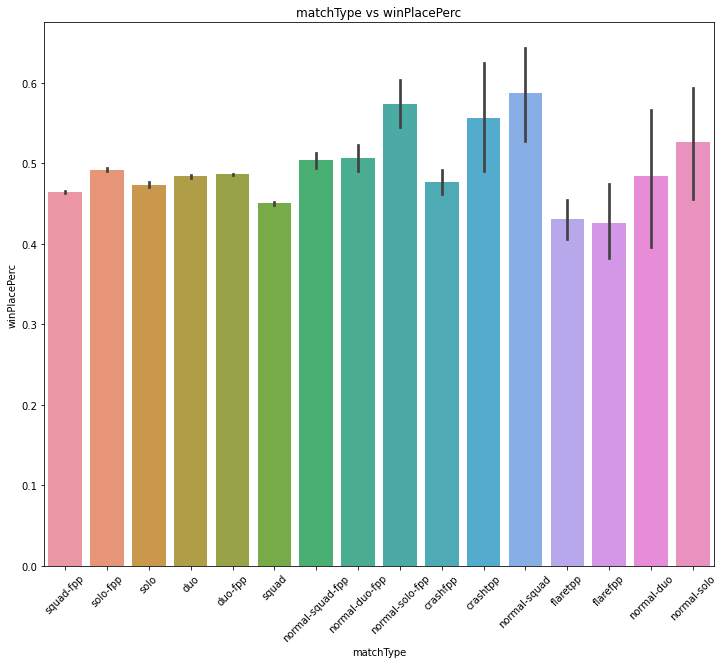

In [22]:
plt.figure(figsize=(12,10))
sns.barplot(x='matchType',y='winPlacePerc',data=data)
plt.title('matchType vs winPlacePerc')
plt.xlabel('matchType')
plt.xticks(rotation=45)

### heal vs win percentage

In [23]:
solo_game = data[data["numGroups"] > 50]
solo = len(solo_game)

duo_game = data[(data["numGroups"] > 25) & (data["numGroups"] <= 50)]
duo = len(duo_game)

squad_game = data[data["numGroups"] <= 25]
squad = len(squad_game)

Text(14, 0.67, 'squad-heal vs win perc')

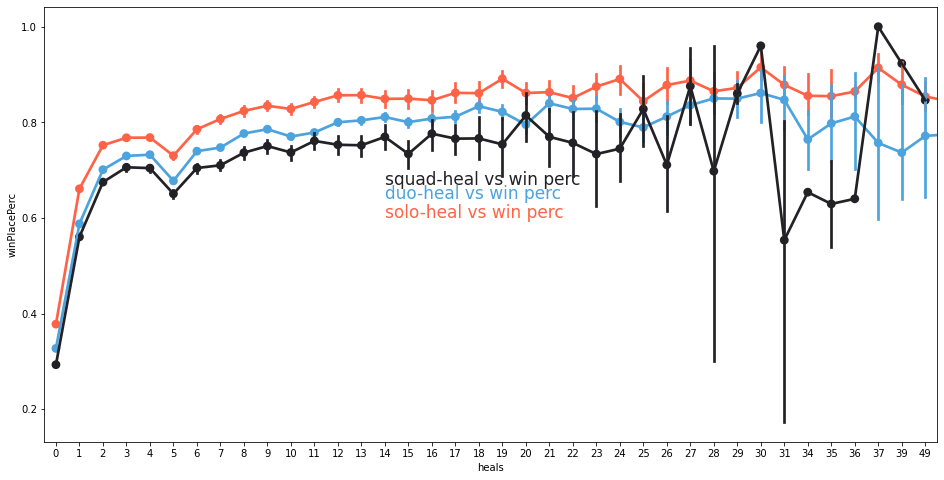

In [24]:
plt.subplots(figsize=(16, 8))
sns.pointplot(x=solo_game["heals"], y=solo_game["winPlacePerc"], color="#ff6347")
plt.text(14,0.6, 'solo-heal vs win perc',color='#ff6347',fontsize = 17)
sns.pointplot(x=duo_game["heals"], y=duo_game["winPlacePerc"], color="#4ca3dd")
plt.text(14,0.64, 'duo-heal vs win perc',color='#4ca3dd',fontsize = 17)
sns.pointplot(x=squad_game["heals"], y=squad_game["winPlacePerc"], color="#212126")
plt.text(14,0.67, 'squad-heal vs win perc',color='#212126',fontsize = 17)

### squad-DBNOs vs winPlacePerc

Text(14, 0.53, 'squad-DBNOs vs winPlacePerc')

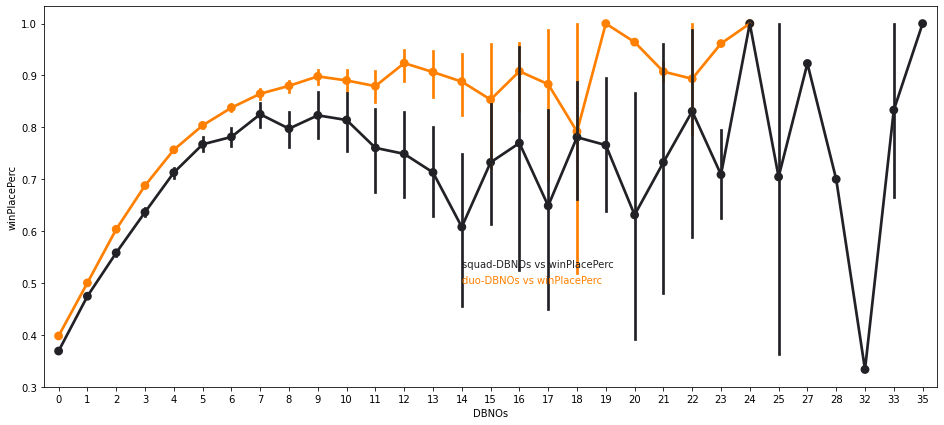

In [25]:
# Number of enemy players knocked vs win percentage
# N.B In solo match their is no chance to knock
plt.subplots(figsize=(16,7))
sns.pointplot(x=duo_game["DBNOs"], y=duo_game["winPlacePerc"], color="#ff8000")
plt.text(14,0.5, "duo-DBNOs vs winPlacePerc", color="#ff8000")
sns.pointplot(x=squad_game["DBNOs"], y=squad_game["winPlacePerc"], color="#212126")
plt.text(14,0.53, "squad-DBNOs vs winPlacePerc", color="#212126")

### kills vs winPlacePerc

<Figure size 1080x504 with 0 Axes>

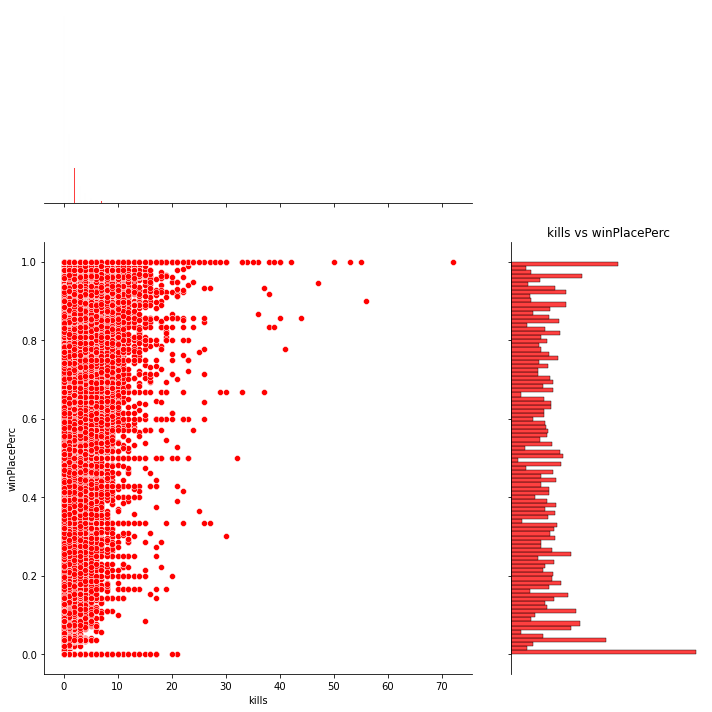

In [26]:
plt.figure(figsize=(15,7))
sns.jointplot(x='kills',y='winPlacePerc',data=data,color='red',height=10,ratio=2)
plt.title('kills vs winPlacePerc')
plt.show()

### boosts vs winPlacePerc

<Figure size 1080x504 with 0 Axes>

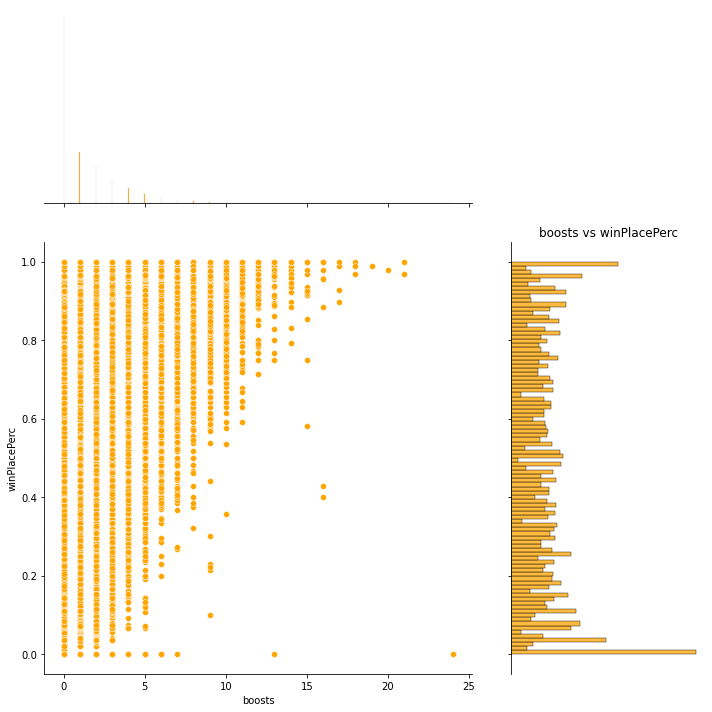

In [27]:
plt.figure(figsize=(15,7))
sns.jointplot(x='boosts',y='winPlacePerc',data=data,color='orange',height=10,ratio=2)
plt.title('boosts vs winPlacePerc')
plt.show()

###  revives vs winPlacePerc

<Figure size 1080x504 with 0 Axes>

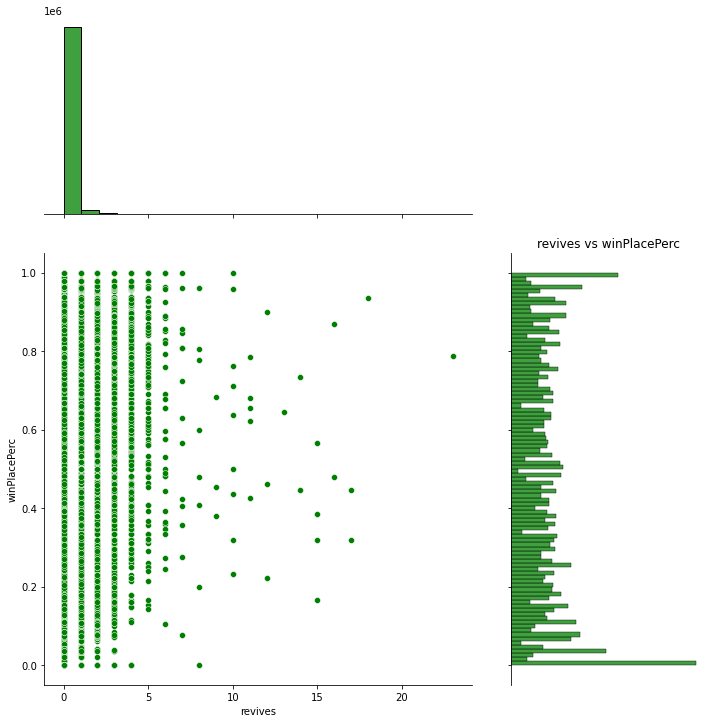

In [28]:
plt.figure(figsize=(15,7))
sns.jointplot(x='revives',y='winPlacePerc',data=data,color='green',height=10,ratio=2)
plt.title('revives vs winPlacePerc')
plt.show()

<AxesSubplot:>

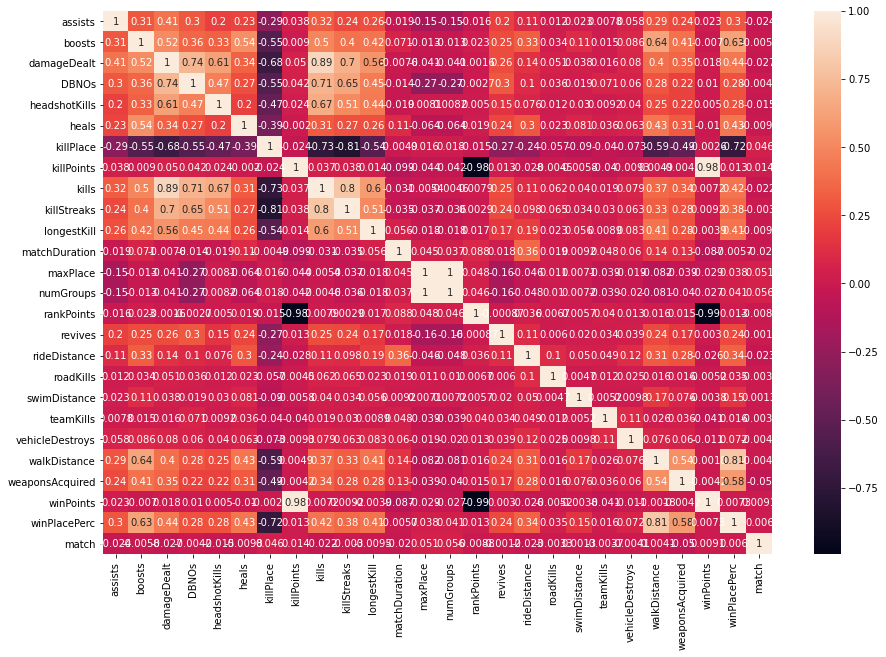

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)